<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/cif2graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An example to get graph from .cif file

In [1]:
!pip install jarvis-tools dgl cif2cell

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.8/973.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.0/515.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyCifRW: filename=PyCifRW-4.4-cp39-cp39-linux_x86_64.whl size=162621 sha256=1f2ee93de7219d107aadfcb53c518263c0ec85028cdb3c1cee4c8f7a80a0a696
  Stored in directory: /root/.cache/pip/wheels/0f/58/a7/cc7faa4fb4aca4aa925bb632cd9ede3f97520dbdceb7975b49
Successfully built PyCifRW


In [2]:
!wget  https://raw.githubusercontent.com/usnistgov/jarvis/master/jarvis/tests/testfiles/core/1000000.cif

--2023-04-16 00:19:12--  https://raw.githubusercontent.com/usnistgov/jarvis/master/jarvis/tests/testfiles/core/1000000.cif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12551 (12K) [text/plain]
Saving to: ‘1000000.cif’

1000000.cif         100%[===================>]  12.26K  --.-KB/s    in 0s      

2023-04-16 00:19:12 (59.8 MB/s) - ‘1000000.cif’ saved [12551/12551]



In [4]:
from jarvis.core.atoms import Atoms
atoms = Atoms.from_cif('1000000.cif')

In [6]:
print (atoms)

P8C20N8Al4H68O32
1.0
7.8783 0.0 0.0
0.0 10.468899999999998 0.0
-6.4368184446516405 0.0 16.00321076926722
Al P H C N O
4 8 68 20 8 32
Cartesian
2.711664092745594 0.4262936079999986 8.480900970222745
-1.2701840927455939 10.042606392000001 7.5223090297772535
-4.488594092745593 5.660743607999998 15.523914029777254
5.930074092745594 4.808156392000002 0.479295970222744
0.15518180322745678 0.5823849070000007 10.159637395285264
3.3735918032274568 4.652065092999999 2.1580323952852654
-2.7874179845548763 2.2610730219999993 7.618168646918778
1.286298196772544 9.886515092999998 5.843572604714734
4.228897984554877 8.207826978 8.385041353081222
7.447307984554876 7.4955230219999995 0.3834363530812218
-6.005827984554876 2.9733769780000006 15.619773646918777
-1.9321118032274556 5.8168349070000005 13.845177604714735
-0.5963689212468266 3.75728821 6.481300553870034
2.710962705994662 6.5849381 11.83437340228908
1.207885461857352 6.36195053 12.14163504905901
4.426295461857352 9.341399469999999 4.1400300490

In [7]:
from jarvis.core.graphs import Graph

In [8]:
g,lg = Graph.atom_dgl_multigraph(atoms=atoms, neighbor_strategy="k-nearest", cutoff=8.0,max_neighbors=12)

In [9]:
print(g)

Graph(num_nodes=140, num_edges=3360,
      ndata_schemes={'atom_features': Scheme(shape=(92,), dtype=torch.float32)}
      edata_schemes={'r': Scheme(shape=(3,), dtype=torch.float32)})


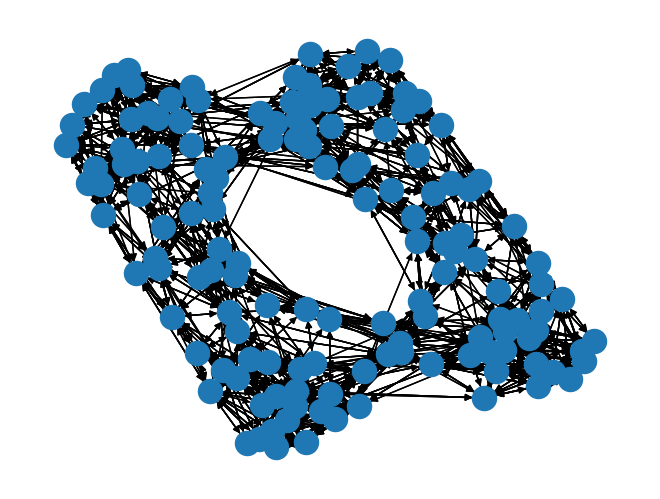

In [10]:
import networkx as nx
nx.draw(g.to_networkx())